Exercicio com dados diabete com normalizacao e teste com regularizacao

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('Datasets/pima-indians-diabetes.csv')

In [4]:
display(data)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Class  
0                       0.627   50      1  
1                       0.351   31      0  
2                       0.672   32      1  
3                       0.167   21      0  
4                       2.288   33      1  
..                        ...  ...    ...  
763                     0.171   63      0  
764                     0.340   27      0  
765                     0.245   30      0  
766                     0.349   47      1  
767                     0.315   23      0  

[768 rows x 9 columns]

In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing



In [40]:
scaler = preprocessing.MinMaxScaler()

y = data['Class']
X = data.drop(['Class'], axis = 1)

X = scaler.fit_transform(X)
# le = preprocessing.LabelEncoder()
# X['famhist'] = le.fit_transform(X['famhist'])

display(X)

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [52]:
X_train, X_teste, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [53]:
classif = SGDClassifier()
classif.fit(X_train, y_train)

print(X_train, y_train)

[[0.05882353 0.6080402  0.63934426 ... 0.58122206 0.07813834 0.11666667]
 [0.17647059 0.44723618 0.60655738 ... 0.45305514 0.20196413 0.28333333]
 [0.64705882 0.71859296 0.7704918  ... 0.54545455 0.07514944 0.5       ]
 ...
 [0.41176471 0.53266332 0.49180328 ... 0.39493294 0.09308284 0.13333333]
 [0.05882353 0.43718593 0.63934426 ... 0.51564829 0.00982067 0.01666667]
 [0.47058824 0.63316583 0.72131148 ... 0.57377049 0.11571307 0.46666667]] 751    0
431    0
24     1
58     0
250    0
      ..
75     0
229    0
276    1
225    0
345    0
Name: Class, Length: 537, dtype: int64


In [54]:
from sklearn.metrics import classification_report

y_pred = classif.predict(X_teste)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       151
           1       0.71      0.57      0.63        80

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
print(confusion_matrix(y_test, y_pred))

[[132  19]
 [ 34  46]]


In [57]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

(300, 1, 8)


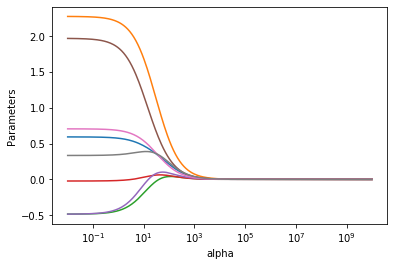

In [62]:
ridge = RidgeClassifier()
MSEs = []
coefs = []


alphas = 10**np.linspace(10,-2,300)*0.5

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train) 
    MSEs.append(mean_squared_error(y_test,ridge.predict(X_teste)))
    coefs.append(ridge.coef_)
    #print(ridge.coef_.shape)
    
print(np.array(coefs).shape)
    
coefs = np.array(coefs).reshape(300,8)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Parameters')

plt.show()

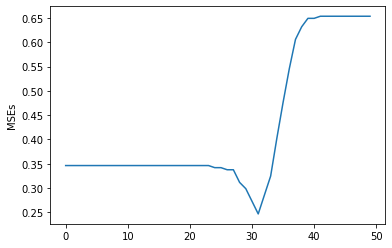

In [64]:
plt.plot(MSEs[100:150])
plt.ylabel('MSEs')

plt.show()

In [65]:
ridge.set_params(alpha = alphas[131])
ridge.fit(X_train, y_train) 
MSE = mean_squared_error(y_test,ridge.predict(X_teste))

print(MSE/10**16)

2.4675324675324676e-17


In [66]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Y_pred = ridge.predict(X_test)
Y_pred_ = ridge.predict(X_teste)

print(Y_pred_)
# REG LINEAR

# plt.scatter(X_test, y_test)
# plt.plot(X_test, Y_pred, color = 'red')
# plt.show()

# REGRESSOR GRAD DESC

# NORMALIZACAO INVERSE PRA PLOTAR!!

X_teste  = pd.DataFrame(scaler.inverse_transform(X_teste))

print(X_teste.shape)
print(y_test.shape)

#display(X_)

# #figg = plt.subplot((2,2,2))
# plt.scatter(X_teste, y_test)
# plt.scatter(X_teste, Y_pred_, color = 'red')

print(confusion_matrix(y_test, Y_pred_))
print(classification_report(y_test, y_pred))

[0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1]
(231, 8)
(231,)
[[134  17]
 [ 40  40]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       151
           1       0.71      0.57      0.63        80

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231

